This example file is intended to cover computations in the publication

    Bankmann, D.; Mehrmann, V.; Nesterov, Y.; van Dooren, P., Computation of the analytic center of the solution set of the linear matrix inequality arising in continuous- and discrete-time passivity analysis, 2019

# Initialization

In [44]:
import logging
import numpy as np
from os.path import join, dirname
from analyticcenter import WeightedSystem, get_algorithm_object
from analyticcenter.visualize import log_log_direction
from analyticcenter.examples.example1 import sys
print("A =\n{}\nB\n= {}\nC\n= {}\nD\n= {}\nQ\n= {}\nR\n= {}\nS\n= {}".format(sys.A, sys.B, sys.C, sys.D, sys.Q, sys.R, sys.S))

A =
[[-2  2]
 [-2 -2]]
B
= [[1]
 [1]]
C
= [[1 1]]
D
= [[2]]
Q
= [[0. 0.]
 [0. 0.]]
R
= [[4]]
S
= [[1]
 [1]]


# Computation of analytic center with the newton approach.

In [26]:
logger = logging.getLogger()

alg_newton = get_algorithm_object(sys, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton, success) = alg_newton()

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 42.33915359523093 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 0.04743947306823446 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 34.3766932110012	Det: 42.339153595230925 (direction.py:69)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- In linearly converging phase (newton.py:62)
[

In [43]:
sys_disc = sys.bilinear_discretization()

alg_newton_disc = get_algorithm_object(sys_disc, 'newton', discrete_time=True, save_intermediate=True)
(ac_newton_disc, success) = alg_newton_disc()

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Computing Analytic Center with Newton approach (direction.py:151)
[INFO    ][InitialXDT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXDT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 1.0021101442658218 (initialization.py:67)
[CRITICAL][analyticcenter.misc.misc] --- Matrix H(X) is not non-negative (misc.py:50)
[INFO    ][InitialXDT] --- Computed initial guess with bisection approach.
det(H(X0)) = 0.13392998218763616 (initialization.py:78)
[INFO    ][InitialXDT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 0	Residual: 3.5118759875769765	Det: 1.0021101442658216 (direction.py:69)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- In linearly converging phase (newton.py:62)
[INFO    ][NewtonDirec

# Properties of solutions
## Difference
The solutions should be identical in theory. They differ a bit due to roundoff errors.

In [35]:
 print("scaled difference = ", np.linalg.norm((ac_newton.X - ac_newton_disc.X )/ac_newton.X)) 


scaled difference =  1.2530983582362412e-15


## Centered realizations
A centered realization with the analytic center solution `X` has the identity as interior point. However, also here, the geometric mean approach is superior

In [46]:
centered_realization = ac_newton.centered_realization()
alg_newton_centered = get_algorithm_object(centered_realization, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton_centered, success) = alg_newton_centered()
print("Eigenvalues of analytic center:\n",np.linalg.eigh(ac_newton_centered.X)[0])

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 0.2602187987515395 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 0.0002915656466172808 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 4.4912956223919105	Det: 0.26021879875

## Final closed-loop matrix
We recover the properties, that every eigenvalue of the continuous-time closed-loop matrix lies on the imaginary axis, while all eigenvalues in the discrete-time case lie inside the unit circle.

In [41]:
eigs = np.linalg.eig(ac_newton.A_F)[0]
print("maximal abs value of real parts of eigenvalues:\n", np.max(np.abs(np.real(eigs))))
eigs_disc = np.linalg.eig(ac_newton_disc.A_F)[0]
print("absolute values of evs of discrete closed-loop matrix:\n", np.abs(eigs_disc))

maximal abs value of real parts of eigenvalues:
 2.220446049250313e-16
absolute values of evs of discrete closed-loop matrix:
 [0.87848955 0.87848955]


# Computation of characteristic values

Compute the characterisic values, as in the paper 'Beattie, Mehrmann, van Dooren'.
Note, that the values compared to the paper slightly changed, because of some improvements in the alogorithm and thus slightly different value for the analytic center.

In [42]:
ac_newton.compute_characteristic_values()

[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of H(X): 1.4645413431373524 (analyticcenter.py:37)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of X-1 * H(X) * X^-1: 0.1008482722870669 (analyticcenter.py:47)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of X^-.5 * H(X) * X^-.5: 0.8954367977245573 (analyticcenter.py:57)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of R of the pH realization: 1.6208483152133384 (analyticcenter.py:66)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Distance to stability is: (1.7189257771789195, 1.7188963032633886) (analyticcenter.py:68)


# Generate plot of the algorithm

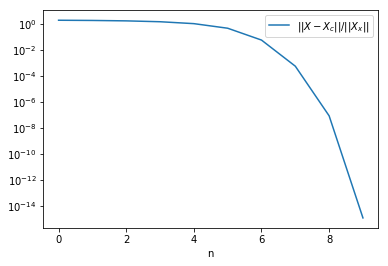

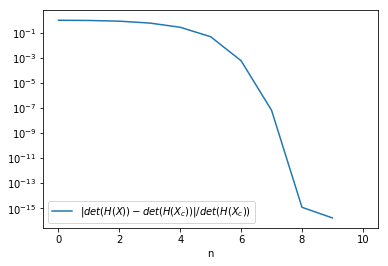

In [14]:
log_log_direction(alg_newton.intermediate_X, alg_newton.intermediate_det)

# Computation with steepest ascent approach

*Warning*: This needs some time and does not even succeed in 20000 iterations, even though the determinant increases in every step.

In [16]:
alg_steepest_ascent = get_algorithm_object(sys, 'steepestascent', discrete_time=False, save_intermediate=True)
alg_steepest_ascent.abs_tol = 10e-1
alg_steepest_ascent.maxiter = 2000000
X0=alg_newton.intermediate_X[6]
(ac_steepest_ascent, success) = alg_steepest_ascent(X0=X0)

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][SteepestAscentDirectionCT] --- Computing Analytic Center with Steepest Ascent approach (direction.py:151)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 0	Residual: 4.998519824255914	Det: 2641.6168898195256 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.0996757042604082 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 1	Residual: 5.959946435516278	Det: 2642.1083426212667 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.024386350969092942 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2	Residual: 6.778129422864957	Det: 2642.20235307439 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by l

[INFO    ][SteepestAscentDirectionCT] --- Current step: 30	Residual: 1.9168304826305465	Det: 2643.0767758798725 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.009384761853548201 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 31	Residual: 1.510579557608395	Det: 2643.083460517351 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.006197457702002494 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 32	Residual: 1.7561213569383258	Det: 2643.0895796222853 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.008590542761456585 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 33	Residual: 1.3840132362808641	Det: 2643.0951826775495 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 0.005673012166506775 (steepestascent.py:38)
[INFO    ]

In [ ]:
log_log_direction(alg_steepest_ascent.intermediate_X, alg_steepest_ascent.intermediate_det)